# Participant Screening - Experiment 1: Illusory Tempo

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATAFILE = '../data/tap_data.csv'
OUTFILE = '../data/excluded.txt'  # List of excluded participants
FAILED_TEST_FILE = '../data/failed_headphone_test.txt'  # List of participants who failed headphone test

# Load data

In [2]:
all_data = pd.read_csv(DATAFILE)
data = all_data.copy()

# Headphone Test
Identify participants who got answered fewer than four headphone test trials correctly.

EXCLUDED: 8
[13 28 32 49 58 60 64 68]


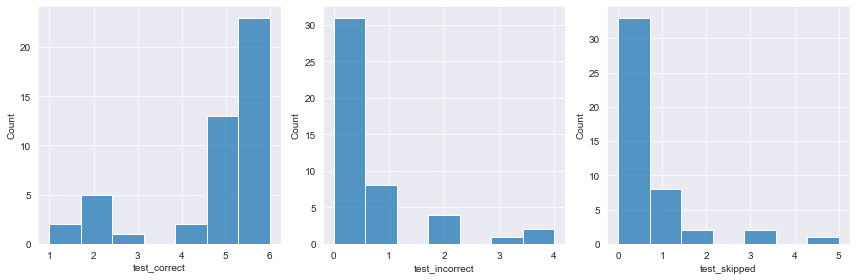

In [3]:
failed_test = np.array(data[data.test_correct < 4].subject)
print('FAILED: %i' % len(failed_test))
print(failed_test)

# Audio test performance
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.histplot(data.test_correct, bins=7)
plt.subplot(132)
sns.histplot(data.test_incorrect, bins=7)
plt.subplot(133)
sns.histplot(data.test_skipped, bins=7)
plt.tight_layout()

# Save list of participants who failed the test
np.savetxt(FAILED_TEST_FILE, failed_test, fmt='%i')

# Extreme Response Check
Identify participants who responded 0/50/100 at least 75 times.

EXCLUDED: 1
[14]


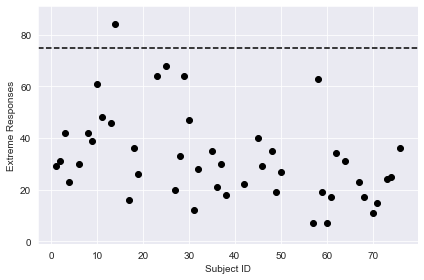

In [4]:
grouped = data.groupby('subject')
extreme_resp = grouped.extreme_responses.mean() >= 75
extreme_resp = np.array(extreme_resp[extreme_resp].reset_index().subject)
print('EXCLUDED: %i' % len(extreme_resp))
print(extreme_resp)

plt.scatter(data.subject, data.extreme_responses, c='k', label='Included')
plt.axhline(75, c='k', ls='--')
plt.ylim(-1, 91)
plt.ylabel('Extreme Responses')
plt.xlabel('Subject ID')
plt.tight_layout()

# Drop excluded subjects before proceeding
data = data[~np.isin(data.subject, extreme_resp)]

# Outlier Response Check
Exclude participants whose responses were correlated r < .5 with the log of IOI.

EXCLUDED: 1
[30]


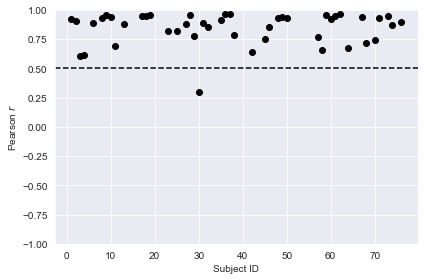

In [5]:
outlier = np.array(data[data.pearsonr < .5].subject)
print('EXCLUDED: %i' % len(outlier))
print(outlier)

plt.scatter(data.subject, data.pearsonr, c='k')
plt.axhline(.5, c='k', ls='--')
plt.ylim(-1, 1)
plt.ylabel('Pearson $r$')
plt.xlabel('Subject ID')
plt.tight_layout()

# Drop excluded subjects before proceeding
data = data[~np.isin(data.subject, outlier)]

# Save Exclusion

In [6]:
excluded = np.union1d(extreme_resp, outlier)
included = data.subject.unique()
np.savetxt(OUTFILE, excluded, fmt='%i')

In [7]:
conditions = np.array([x for x in all_data.tap_condition])
incl_conditions = np.array([x for x in data.tap_condition])

print('EXCLUSION LIST:', excluded.tolist())
print('INCLUSION LIST:', included.tolist())
print('TOTALS:', len(excluded) + len(included), len(included))
print('CONDITIONS:', np.sum(~conditions), np.sum(conditions), np.sum(~incl_conditions), np.sum(incl_conditions))

EXCLUSION LIST: [14, 30]
INCLUSION LIST: [1, 2, 3, 4, 8, 6, 9, 10, 11, 13, 17, 18, 19, 23, 25, 27, 28, 29, 31, 32, 35, 36, 37, 38, 42, 45, 46, 50, 48, 49, 57, 58, 59, 61, 60, 62, 67, 64, 68, 70, 71, 73, 74, 76]
TOTALS: 46 44
CONDITIONS: 24 22 23 21
